# Descrição da Base de Dados ClassicHits

Esta base de dados contém **15,150 clássicos da música** de **3,083 artistas**, abrangendo **um século de história musical** de 1923 a 2023. Os dados estão organizados em **19 gêneros distintos**, permitindo a análise da evolução da música ao longo do tempo.

## Variáveis Selecionadas

Aqui estão as **variáveis** que serão usadas para a análise:

1. **Track**: O título da música.
2. **Artist**: O nome do artista ou banda que interpreta.
3. **Year**: O ano em que a faixa foi lançada.
4. **Duration**: Duração da faixa em milissegundos.
5. **Time_Signature**: A assinatura de compasso musical da faixa (ex: 4/4).
6. **Danceability**: Uma medida de quão adequada a faixa é para dançar, variando de 0,0 a 1,0.
7. **Energy**: Uma medida da intensidade e atividade da faixa, variando de 0,0 a 1,0.
8. **Key**: A chave da faixa (ex: 0=C).
9. **Loudness**: O volume geral da faixa em decibéis (dB).
10. **Mode**: A modalidade da faixa, tipicamente maior (1) ou menor (0).
11. **Speechiness**: Uma medida indicando a presença de palavras faladas na faixa, variando de 0,0 a 1,0.
12. **Acousticness**: Uma medida de quão acústica é a faixa, variando de 0,0 a 1,0.
13. **Instrumentalness**: Uma medida da probabilidade de a faixa ser instrumental, variando de 0,0 a 1,0.
14. **Liveness**: Uma medida da presença de um público ao vivo na faixa, variando de 0,0 a 1,0.
15. **Valence**: Uma medida da positividade musical da faixa, variando de 0,0 a 1,0.
16. **Tempo**: A velocidade da faixa em batidas por minuto (BPM).
17. **Popularity**: Uma medida da popularidade da faixa, variando de 0 a 100.
18. **Genre**: Gênero da faixa.

### Autor do Readme:

<a href="https://github.com/Kevinl284">
    <img src="https://github.com/Kevinl284.png" width="100" height="100" />
</a>

ProjetoA3: Inteligência Artificial
2024.2 manhã


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
# Lê o arquivo CSV e carrega os dados em um DataFrame
data = pd.read_csv('../input/basehits/ClassicHit.csv')

In [3]:
# Mostra as primeiras 5 linhas do DataFrame para visualização inicial
data.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [4]:
# Exibe o tipo de dados e a quantidade de valores não nulos em cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [5]:
# Descreve estatísticas básicas como média, desvio padrão, min, max, etc. das colunas numéricas
data.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


In [6]:
# Mostra a forma do DataFrame, ou seja, a quantidade de linhas e colunas
print("Data Shape:",data.shape)

Data Shape: (15150, 18)


In [7]:
# Retorna a contagem de valores ausentes (NaN) em cada coluna
data.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

In [8]:
# Encontrar as linhas duplicadas
duplicates = data[data.duplicated()]

# Mostrar as linhas duplicadas
print("Linhas Duplicadas:")
print(duplicates)

# Remover duplicatas do DataFrame
data_cleaned = data.drop_duplicates()

# Verificar quantas duplicatas restam
print("Total de Duplicatas após remoção:", data_cleaned.duplicated().sum())

Linhas Duplicadas:
          Track Artist  Year  Duration  Time_Signature  Danceability  Energy  \
3640  Happy Now   Zedd  2019    207029               3         0.503   0.741   

      Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
3640    4    -5.128     1        0.047         0.579          0.000001   

      Liveness  Valence   Tempo  Popularity Genre  
3640    0.0712    0.458  88.335          63   EDM  
Total de Duplicatas após remoção: 0


In [9]:
# Verifica quantas linhas duplicadas existem no DataFrame
print("Data Duplicated:",data.duplicated().sum())

Data Duplicated: 1


In [10]:
# Mostra as primeiras 5 linhas do DataFrame, agora com as colunas numéricas criadas
data.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix

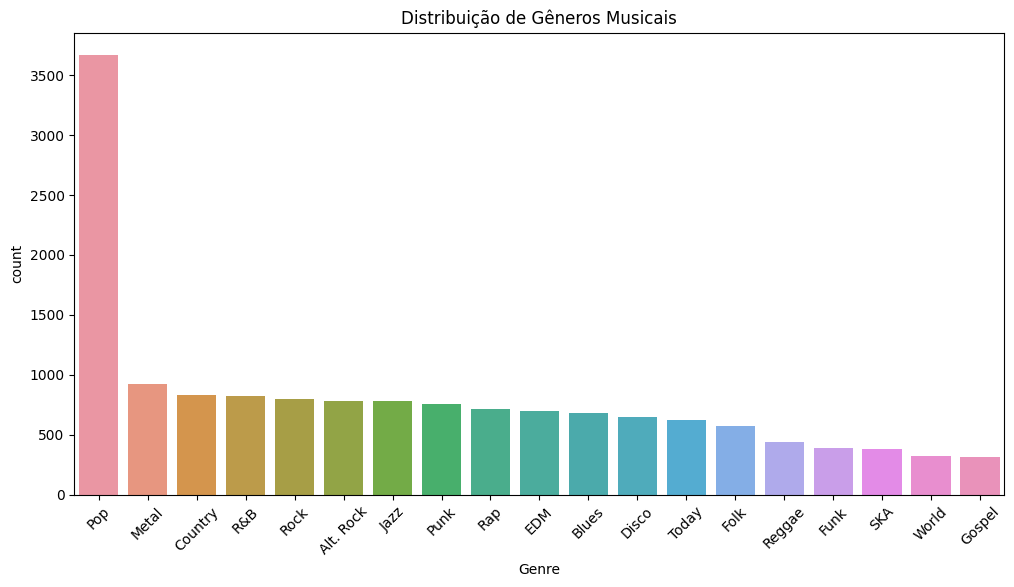

In [12]:
# Gráfico de distribuição de gêneros
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index)
plt.title('Distribuição de Gêneros Musicais')
plt.xticks(rotation=45)
plt.show()

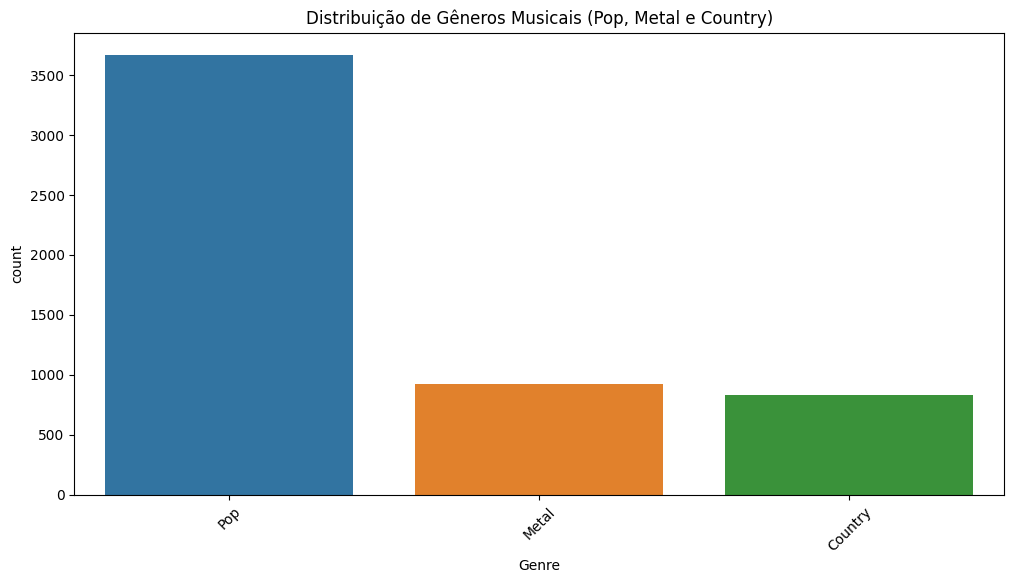

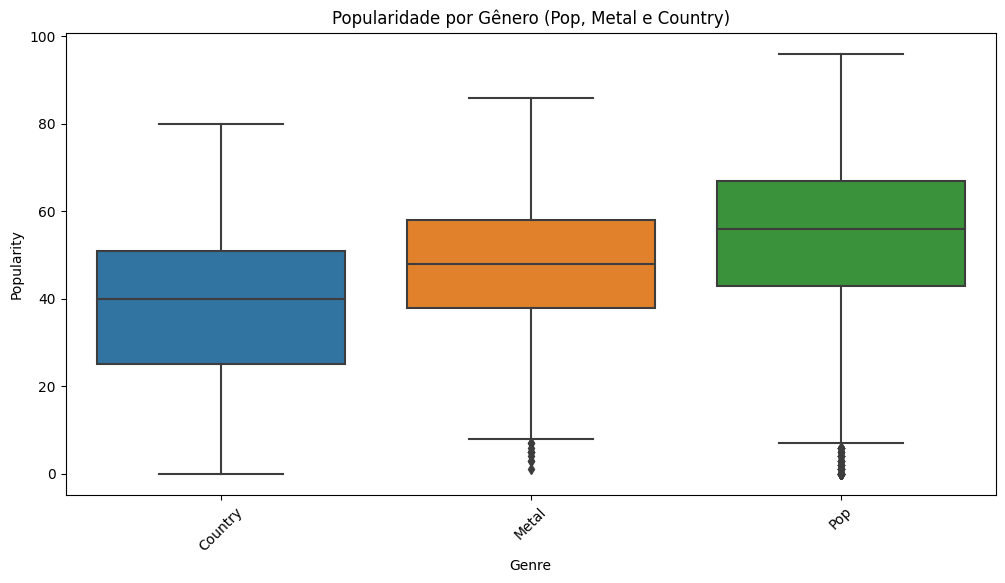

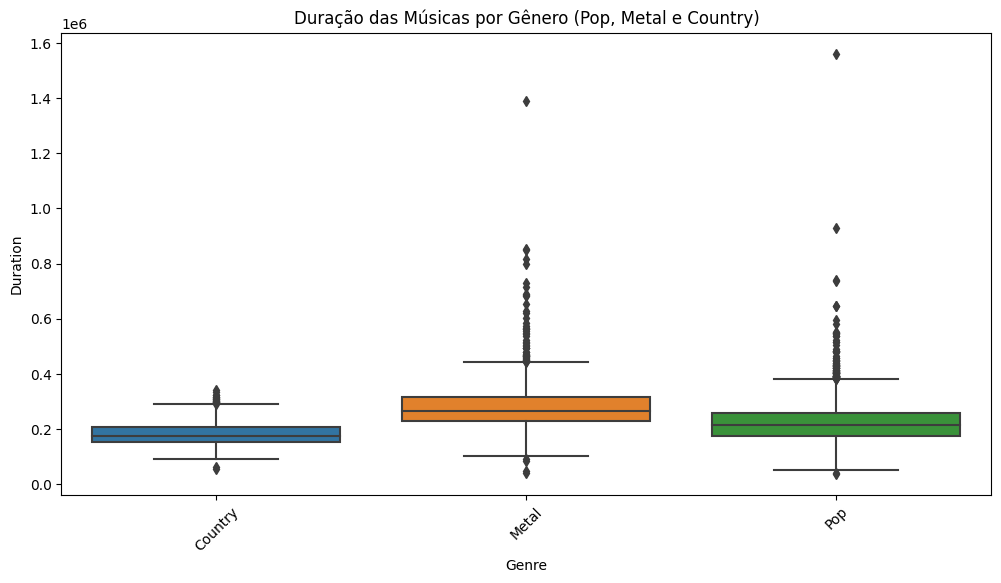

In [13]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Gráfico de distribuição de gêneros filtrados
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Genre', order=filtered_data['Genre'].value_counts().index)
plt.title('Distribuição de Gêneros Musicais (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de boxplot para analisar a popularidade por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Genre', y='Popularity')
plt.title('Popularidade por Gênero (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de boxplot para analisar a duração por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Genre', y='Duration')
plt.title('Duração das Músicas por Gênero (Pop, Metal e Country)')
plt.xticks(rotation=45)
plt.show()


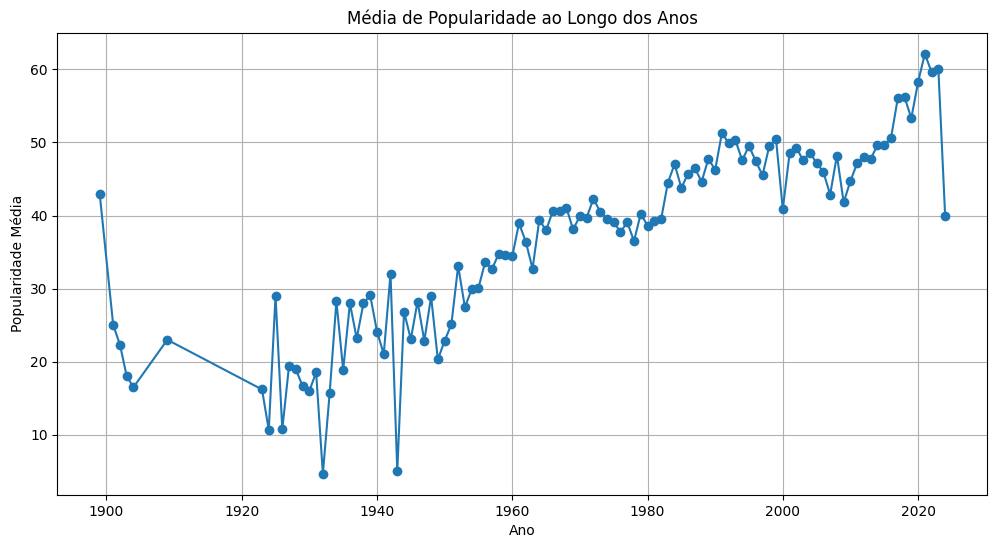

In [14]:
# Gráfico de média de popularidade por ano
plt.figure(figsize=(12, 6))
data.groupby('Year')['Popularity'].mean().plot(kind='line', marker='o')
plt.title('Média de Popularidade ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

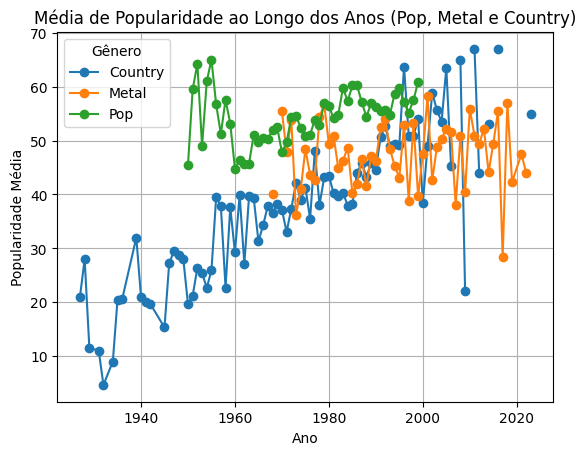

In [15]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Calcular a média de popularidade por ano e gênero
mean_popularity = filtered_data.groupby(['Year', 'Genre'])['Popularity'].mean().unstack()

# Gráfico de média de popularidade ao longo dos anos
plt.figure(figsize=(12, 6))
mean_popularity.plot(kind='line', marker='o')
plt.title('Média de Popularidade ao Longo dos Anos (Pop, Metal e Country)')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid()
plt.legend(title='Gênero')
plt.show()

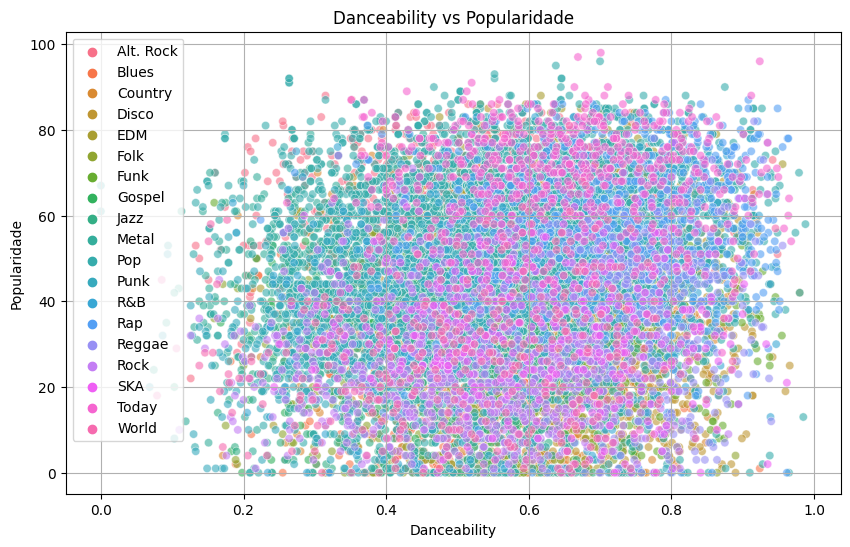

In [16]:
# Gráfico de dispersão entre Danceability e Popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Danceability', y='Popularity', hue='Genre', alpha=0.6)
plt.title('Danceability vs Popularidade')
plt.xlabel('Danceability')
plt.ylabel('Popularidade')
plt.legend(loc='upper left')
plt.grid()
plt.show()

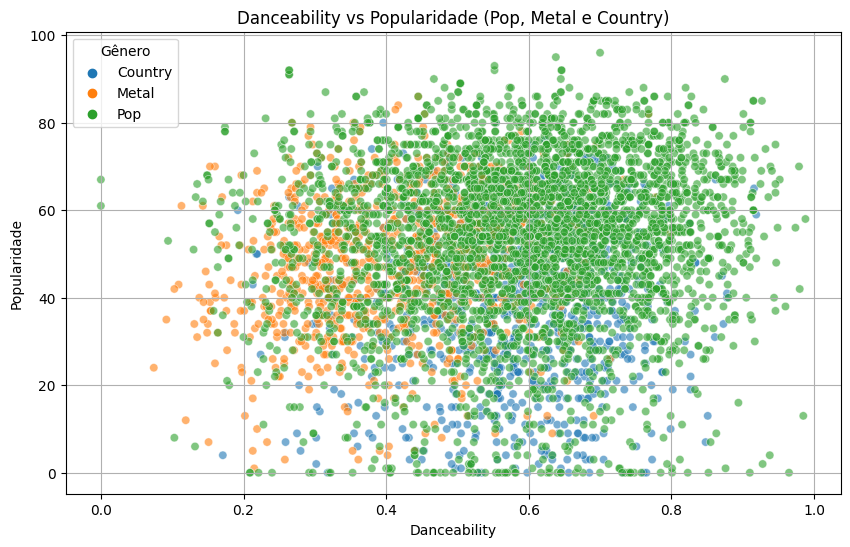

In [17]:
# Filtrar os dados para incluir apenas os gêneros desejados
filtered_data = data[data['Genre'].isin(['Pop', 'Metal', 'Country'])]

# Gráfico de dispersão entre Danceability e Popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Danceability', y='Popularity', hue='Genre', alpha=0.6)
plt.title('Danceability vs Popularidade (Pop, Metal e Country)')
plt.xlabel('Danceability')
plt.ylabel('Popularidade')
plt.legend(title='Gênero', loc='upper left')
plt.grid()
plt.show()


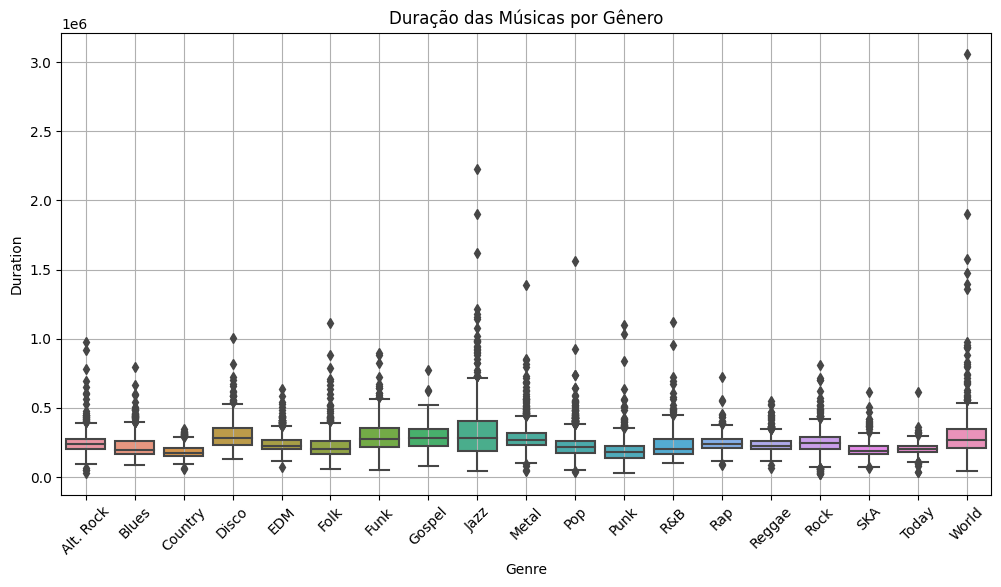

In [18]:
# Boxplot da duração das músicas por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Genre', y='Duration')
plt.title('Duração das Músicas por Gênero')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Matriz de Correlação

A matriz de correlação é uma ferramenta estatística que permite visualizar a relação entre várias variáveis em um conjunto de dados. Ela mostra como duas variáveis estão relacionadas entre si, indicando a força e a direção dessa relação.

## Interpretação da Matriz de Correlação:

- **Valores Variando de -1 a 1**:
  - **1**: Correlação positiva perfeita. Quando uma variável aumenta, a outra também aumenta.
  - **-1**: Correlação negativa perfeita. Quando uma variável aumenta, a outra diminui.
  - **0**: Nenhuma correlação. Não há relação linear entre as variáveis.

- **Uso Prático**: 
  - Ajuda a identificar padrões e tendências em dados musicais, como a relação entre popularidade, energia, e danceability.
  - Facilita a escolha de variáveis relevantes para modelos de predição.

A visualização da matriz de correlação permite identificar rapidamente as variáveis que mais influenciam umas às outras, sendo uma ferramenta essencial para a análise exploratória de dados.


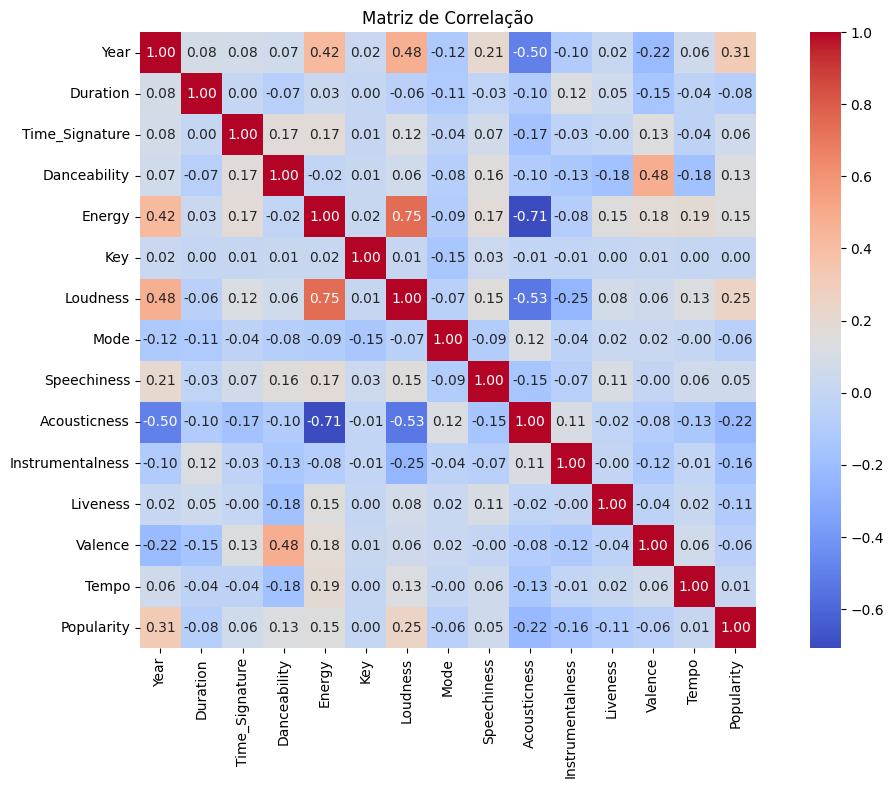

In [19]:
# Filtrar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlação
plt.figure(figsize=(14, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()


# Modelagem de Previsão com Random Forest

Este trecho de código realiza a modelagem preditiva utilizando o algoritmo **Random Forest** para prever a popularidade de músicas com base em características musicais.

## Etapas do Processo:

1. **Seleção de Variáveis**:
   - **Variáveis Independentes (X)**: Inclui atributos como **Danceability**, **Energy**, **Loudness**, **Acousticness** e **Tempo**.
   - **Variável Dependente (y)**: A variável que se deseja prever, que neste caso é a **Popularidade** das músicas.

2. **Divisão dos Dados**:
   - Os dados são divididos em conjuntos de treino e teste, onde **80%** dos dados são usados para treinar o modelo e **20%** para testá-lo.

3. **Criação do Modelo**:
   - Um modelo de **Random Forest** é criado com **100 árvores** (n_estimators) e ajustado aos dados de treino.

4. **Previsões**:
   - O modelo faz previsões sobre a popularidade das músicas no conjunto de teste.

5. **Avaliação do Modelo**:
   - O desempenho do modelo é avaliado usando duas métricas:
     - **Mean Squared Error (MSE)**: Mede a média dos erros quadráticos entre as previsões e os valores reais.
     - **R² Score**: Indica a proporção da variância nos dados que é explicada pelo modelo, variando de **0** a **1** (onde **1** significa que o modelo explica toda a variância).

Este processo permite entender como as características das músicas influenciam sua popularidade e avaliar a eficácia do modelo preditivo.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar variáveis independentes e dependentes
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]
y = data['Popularity']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 347.9384333744141
R²: 0.1824335339044939


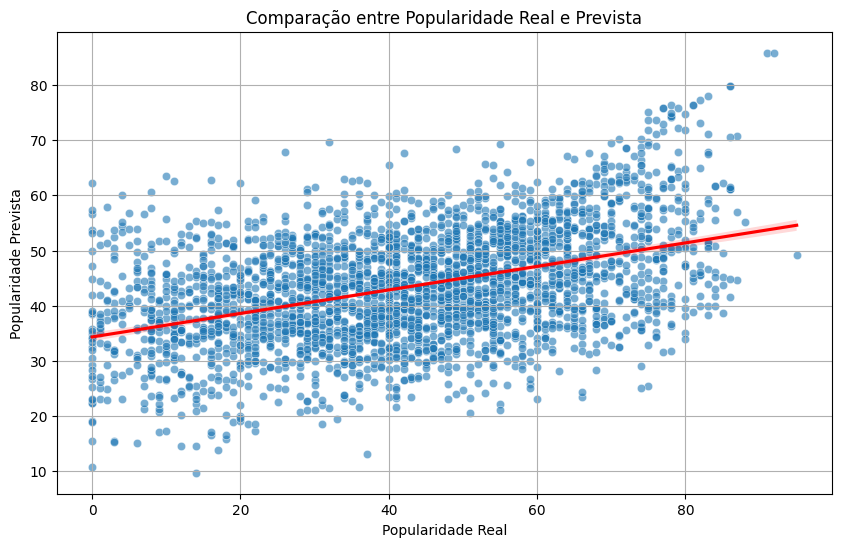

In [21]:
# Criar um DataFrame para as previsões e os valores reais
results = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Real', y='Predito', alpha=0.6)

# Adicionar uma linha de regressão
sns.regplot(data=results, x='Real', y='Predito', scatter=False, color='red')

# Configurações do gráfico
plt.title('Comparação entre Popularidade Real e Prevista')
plt.xlabel('Popularidade Real')
plt.ylabel('Popularidade Prevista')
plt.grid()
plt.show()

# Segmentação de Artistas ou Músicas

## Objetivo
Agrupar artistas ou músicas com características acústicas semelhantes utilizando o algoritmo de clustering K-means. Essa análise ajuda a identificar padrões e tendências nas músicas.

## Metodologia

### 1. Preparação dos Dados
Selecionamos as características numéricas relevantes para o clustering, como:
- Danceability
- Energy
- Loudness
- Acousticness
- Tempo

Esses dados são normalizados para garantir que cada característica contribua igualmente para a análise.

In [22]:
# Selecionar as características numéricas para o clustering
features = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']]

# Normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### 2. Aplicação do K-means
O algoritmo K-means é aplicado para agrupar as músicas em clusters. O número de clusters é definido (por exemplo, 3), e o modelo é ajustado aos dados normalizados. Cada música recebe um rótulo de cluster, indicando a qual grupo pertence.

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir o número de clusters
n_clusters = 3  # Você pode ajustar isso conforme necessário
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo
kmeans.fit(features_scaled)

# Adicionar a coluna de cluster ao DataFrame original
data['Cluster'] = kmeans.labels_

### 3. Visualização dos Clusters
Usamos a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, permitindo a visualização em um gráfico 2D. Cada ponto no gráfico representa uma música, e as cores indicam a qual cluster ela pertence.

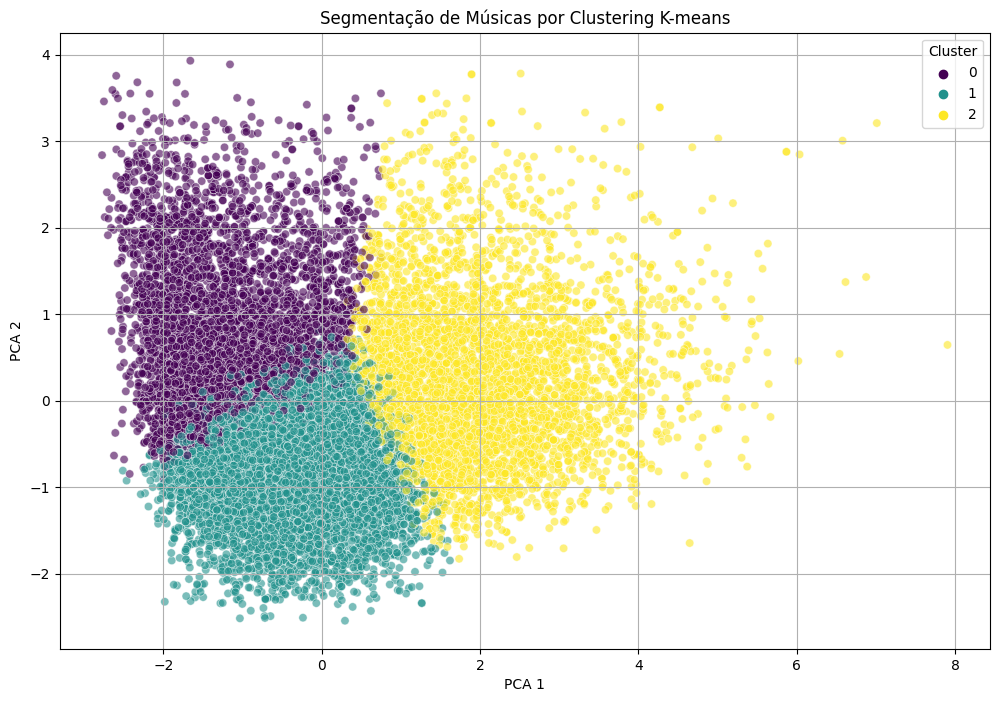

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Adicionar os resultados da PCA e os clusters ao DataFrame
data['PCA1'] = features_pca[:, 0]
data['PCA2'] = features_pca[:, 1]

# Plotar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Segmentação de Músicas por Clustering K-means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

### 4. Análise dos Resultados
Realizamos uma análise das características médias de cada cluster, permitindo entender as semelhanças entre as músicas agrupadas. Isso ajuda a identificar tendências e características comuns dentro de cada grupo.

In [25]:
# Analisar as características médias de cada cluster
cluster_analysis = data.groupby('Cluster')[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo']].mean()
print(cluster_analysis)

         Danceability    Energy   Loudness  Acousticness       Tempo
Cluster                                                             
0            0.451679  0.811439  -6.535681      0.102942  139.163478
1            0.704815  0.663345  -8.279386      0.180355  111.060884
2            0.518939  0.329490 -13.437192      0.712566  114.087827


## Conclusão
A segmentação de músicas através de K-means fornece insights valiosos sobre padrões nas características acústicas, permitindo uma melhor compreensão das preferências musicais e da diversidade sonora.

# Classificação de Gêneros Musicais

## Objetivo
O objetivo deste projeto é classificar uma música em um dos gêneros musicais disponíveis, utilizando características acústicas da faixa como variáveis preditivas.

## Variáveis Independentes
As variáveis utilizadas para a classificação são:
- **Danceability**: Medida de quão adequada a faixa é para dançar.
- **Energy**: Intensity e atividade da faixa.
- **Loudness**: Volume geral da faixa em decibéis (dB).
- **Acousticness**: Medida de quão acústica é a faixa.
- **Tempo**: Velocidade da faixa em batidas por minuto (BPM).
- **Valence**: Medida da positividade musical da faixa.

## Modelo Utilizado
Utilizamos o classificador **Random Forest** para a tarefa de classificação. Este modelo é robusto e eficaz, especialmente em conjuntos de dados com múltiplas características.

Relatório de Classificação:
               precision    recall  f1-score   support

   Alt. Rock       0.15      0.09      0.11       160
       Blues       0.27      0.17      0.21       129
     Country       0.22      0.19      0.20       160
       Disco       0.28      0.21      0.24       132
         EDM       0.57      0.56      0.56       153
        Folk       0.25      0.13      0.17       130
        Funk       0.04      0.01      0.02        77
      Gospel       0.27      0.06      0.10        69
        Jazz       0.31      0.38      0.34       147
       Metal       0.41      0.56      0.48       179
         Pop       0.33      0.62      0.43       765
        Punk       0.35      0.35      0.35       161
         R&B       0.07      0.03      0.04       152
         Rap       0.38      0.26      0.31       141
      Reggae       0.37      0.28      0.32        79
        Rock       0.11      0.03      0.05       144
         SKA       0.23      0.08      0.12        8

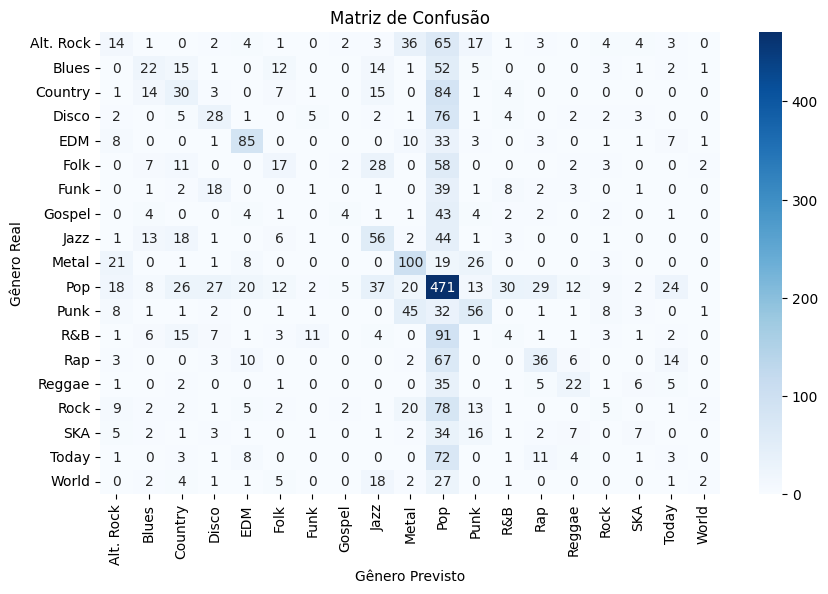

In [26]:
# Selecionar variáveis independentes e dependentes
X = data[['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Tempo', 'Valence']]
y = data['Genre']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matriz de Confusão')
plt.xlabel('Gênero Previsto')
plt.ylabel('Gênero Real')
plt.show()

## Resultados
Após a divisão dos dados em conjuntos de treino e teste, o modelo foi treinado e, em seguida, fez previsões sobre o conjunto de teste. Os resultados foram avaliados através de um relatório de classificação e uma matriz de confusão.

### Matriz de Confusão
A matriz de confusão apresenta a quantidade de previsões corretas e incorretas do modelo, permitindo visualizar como os gêneros foram classificados em comparação com os gêneros reais.

## Conclusão
O modelo de classificação de gêneros musicais mostrou-se eficaz ao prever os gêneros com base nas características acústicas das faixas. A análise dos resultados, por meio da matriz de confusão e do relatório de classificação, ajuda a identificar áreas onde o modelo pode ser melhorado e a entender como diferentes características influenciam a classificação de gêneros musicais.